<div style="font-family:'Fira Sans Condensed';font-size:18px;">

<h2>Covid-19 - Exploratory Data Analysis & Visualization</h2>
        
</div>

In [1]:
import math 
import random
from datetime import timedelta
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# Plot imports
import chart_studio.plotly as py
import plotly.graph_objs as go
## Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

# Full display rows option
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Color palettes
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

<div style="font-family:'Fira Sans Condensed';font-size:20px;">
    
<h3>Repo. of latest dataset </h3>
The following Github repository provides a daily update of the Covid-19 dataset. It is important to emphasize that even though the source of the dataset from which this repository refers to seemed official the source it provides remains <b>unofficial</b> and so do the following analysis & visualization. This is only carried out for <b>educational purposes</b>. 

</div>

In [2]:
global_cases_url = 'https://raw.githubusercontent.com/laxmimerit/Covid-19-Preprocessed-Dataset/master/preprocessed/countrywise.csv'
country_time_series_url = 'https://raw.githubusercontent.com/laxmimerit/Covid-19-Preprocessed-Dataset/master/preprocessed/covid_19_data_cleaned.csv'
global_time_series_url = 'https://raw.githubusercontent.com/laxmimerit/Covid-19-Preprocessed-Dataset/master/preprocessed/daywise.csv'

In [3]:
global_cases = pd.read_csv(global_cases_url) 
country_time_series = pd.read_csv(country_time_series_url, parse_dates=['Date'])
global_time_series = pd.read_csv(global_time_series_url, parse_dates=['Date'])

In [4]:
global_cases.head()
global_cases.shape
country_time_series.head()
country_time_series.shape
global_time_series.head()
global_time_series.shape

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
0,Afghanistan,38544,1420,31048,6076,24,3.68,80.55,4.57,38928341,990.0,38243,301,0.79
1,Albania,10704,322,6284,4098,151,3.01,58.71,5.12,2877800,3720.0,9728,976,10.03
2,Algeria,47216,1581,33379,12256,278,3.35,70.69,4.74,43851043,1077.0,45158,2058,4.56
3,Andorra,1301,53,938,310,40,4.07,72.10,5.65,77265,16838.0,1199,102,8.51
4,Angola,3092,126,1245,1721,59,4.08,40.27,10.12,32866268,94.0,2777,315,11.34


(188, 14)

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-23,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2,2020-01-24,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
3,2020-01-25,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
4,2020-01-26,NaN,Afghanistan,33.93911,67.709953,0,0,0,0


(68440, 9)

,Date,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of Countries
0,2020-01-22,555,17,28,510,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,2.64,2.46,107.69,13


(232, 10)

In [5]:
def rename_cols(df, cols):
    df.rename(columns=cols, inplace=True)
    return df

In [6]:
# Fill missing values
country_time_series['Province/State'] = country_time_series['Province/State'].fillna('')
# Rename cols 
global_cases_cols = {
    'New Cases': 'New_Confirmed_Cases',
    'Deaths / 100 Cases': 'Death_per_100_Cases',
    'Recovered / 100 Cases': 'Recovered_per_100_Cases',
    'Deaths / 100 Recovered': 'Death_per_100_Cases',
    'Cases / Million People': 'Cases_per_Million',
    'Confirmed last week': 'Lastweek_Confirmed_Cases',
    '1 week change': '1_Week_Diff',
    '1 week % increase': '1_Week_Percent_Increase'
}
country_time_series_cols = {
    'Province/State': 'Province_State',
}
global_time_series_cols = {
    'New Cases': 'New_Confirmed_Cases',
    'Deaths / 100 Cases': 'Deaths_per_100_Cases',
    'Recovered / 100 Cases': 'Recovered_per_100_Cases',
    'Deaths / 100 Recovered': 'Deaths_per_100_Recovered',
    'No. of Countries': 'No_of_Countries',
}
# Renaming 
global_cases = rename_cols(global_cases, global_cases_cols)
country_time_series = rename_cols(country_time_series, country_time_series_cols)
global_time_series = rename_cols(global_time_series, global_time_series_cols)

In [7]:
country_time_series.isnull().sum()
country_time_series.info()

Date              0
Province_State    0
Country           0
Lat               0
Long              0
Confirmed         0
Recovered         0
Deaths            0
Active            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68440 entries, 0 to 68439
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            68440 non-null  datetime64[ns]
 1   Province_State  68440 non-null  object        
 2   Country         68440 non-null  object        
 3   Lat             68440 non-null  float64       
 4   Long            68440 non-null  float64       
 5   Confirmed       68440 non-null  int64         
 6   Recovered       68440 non-null  int64         
 7   Deaths          68440 non-null  int64         
 8   Active          68440 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 4.7+ MB


In [8]:
confirmed = country_time_series.groupby('Date').sum()['Confirmed'].reset_index()
recovered = country_time_series.groupby('Date').sum()['Recovered'].reset_index()
deaths = country_time_series.groupby('Date').sum()['Deaths'].reset_index()

In [9]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


<div style="font-family:'Fira Sans Condensed';font-size:20px;">    
    <h4>COVID-19 world trend since January 22, 2020</h4> 
</div>

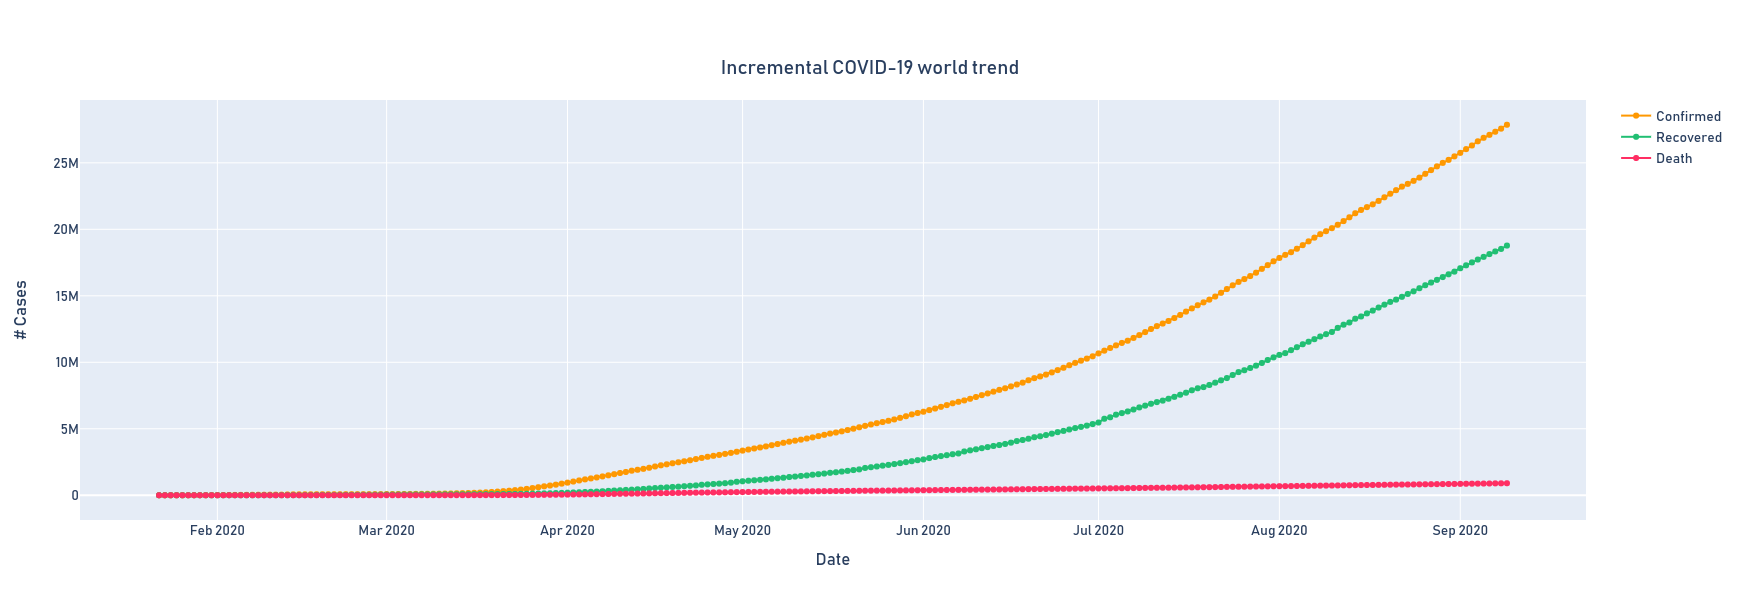

In [10]:
# Color palettes
# cnf = '#393e46'
# dth = '#ff2e63'
# rec = '#21bf73'
# act = '#fe9801'

trace_confirmed = go.Scatter(
        x = confirmed["Date"],
        y = confirmed["Confirmed"],
        line = dict(color=act, width=2),
        name = 'Confirmed',
        mode = 'lines+markers'
    )
trace_recovered = go.Scatter(
        x = recovered["Date"],
        y = recovered["Recovered"],
        name = 'Recovered',
        line = dict(color=rec, width=2),
        mode = 'lines+markers'
    )

trace_death = go.Scatter(
        x = deaths["Date"],
        y = deaths["Deaths"],
        name = 'Death',
        line = dict(color=dth, width=2),
        mode = 'lines+markers'
    )

layout = go.Layout(title=dict(text='Incremental COVID-19 world trend', xanchor='center', yanchor='top', y=0.9, x=0.5),
                   font=dict(size=14),
                   font_family="PT Sans Narrow",
                   height=600,
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='# Cases'))

fig = go.Figure(data=[trace_confirmed, trace_recovered, trace_death], layout=layout)
fig.show()